In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import time

%matplotlib inline
images_folder = "Images"

blurry_spiral = "blurry_spiral.png"
coins = "coins.png"
pepper = "pepper_noise.png"
salt = "salt_noise.png"
salt_pepper = "salt_and_pepper_noise.png"
test = "testPattern.jpg"
tiger = "tiger.jfif"

#joining paths for all images
path_spiral = os.path.join(images_folder, blurry_spiral)
path_coins = os.path.join(images_folder, coins)
path_pepper =  os.path.join(images_folder, pepper)
path_salt = os.path.join(images_folder, salt)
path_salt_pepper = os.path.join(images_folder, salt_pepper)
path_test = os.path.join(images_folder, test)
path_tiger = os.path.join(images_folder, tiger)

#reading images and storing in respective variables
spiral = cv2.imread(path_spiral)
coins = cv2.imread(path_coins)
pepper = cv2.imread(path_pepper)
salt = cv2.imread(path_salt)
salt_pepper = cv2.imread(path_salt_pepper)
test = cv2.imread(path_test)
tiger = cv2.imread(path_tiger)

spiral_gray = cv2.cvtColor(spiral, cv2.COLOR_BGR2GRAY)
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
pepper_gray = cv2.cvtColor(pepper, cv2.COLOR_BGR2GRAY)
salt_gray = cv2.cvtColor(salt, cv2.COLOR_BGR2GRAY)
salt_pepper_gray = cv2.cvtColor(salt_pepper, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
tiger_gray = cv2.cvtColor(tiger, cv2.COLOR_BGR2GRAY)

In [3]:
IMG1 = test_gray
IMG2 = salt_gray
IMG3 = pepper_gray
IMG4 = salt_pepper_gray
IMG5 = spiral_gray
IMG6 = coins_gray
IMG7 = tiger_gray

### 1. CONVOLUTION

Text(0.5, 1.0, 'Result of applying Convolution using the kernel with all 1s')

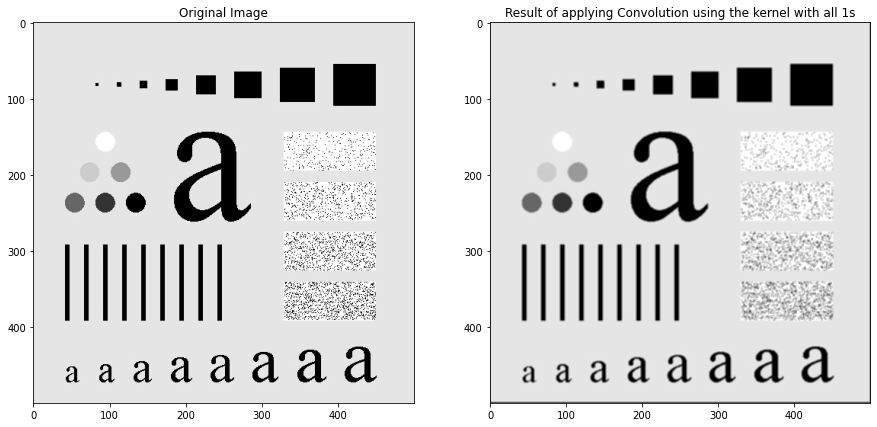

In [41]:
def conv2D(img, kernel):

    h, w = img.shape

    kernel_size = kernel.shape[0]   
    # Since we are assuming a square kernel, kernel.shape[0] = kernel.shape[1]
    pad = kernel_size // 2

    # if img.ndim == 3:
    #     img = np.mean(img, axis=-1)
    
    output_img = np.zeros((h, w))
    
    for i in range(h):
        for j in range(w):
            
            # bounds for region that we want to extract

            top = max(i - pad, 0)
            left = max(j - pad, 0)
            bottom = min(i + pad + 1, h-1)
            right = min(j + pad + 1, w-1)
          
            region = img[top:bottom, left:right]
            region_height, region_width = region.shape

            # Variable to accumulate the result
            result = 0
            
            if region_height > 0 and region_width > 0:
                # Adjust the kernel size if it's larger than the region
                kernel_region = kernel[:region_height, :region_width]
                result = np.sum(region * kernel_region)

                # Assign the result to the corresponding pixel in the output image
                
                output_img[i, j] = result
                
    return output_img
    #return np.clip(output_img, 0, 255).astype(np.uint8)


kernel = np.array([[1,1,1], [1,1,1], [1,1,1]])
result = conv2D(IMG1, kernel)
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(IMG1, cmap="gray")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(result, cmap="gray")
plt.title("Result of applying Convolution using the kernel with all 1s")

#### Mean Filter

Text(0.5, 1.0, 'Test Pattern Image with Mean Filter applied')

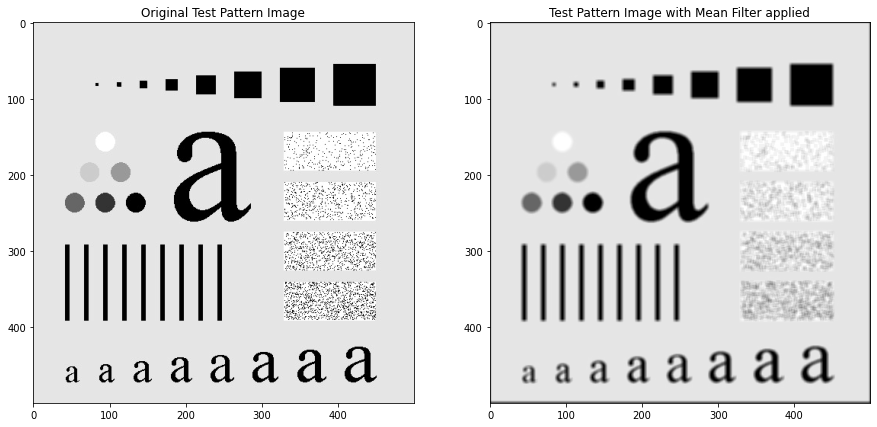

In [35]:
def meanFilter(img, k):  # k is kernel size
    
    kernel = np.ones((k, k)) / (k**2)
    filtered_img = conv2D(img, kernel)
    return filtered_img

# Applying mean filter on IMG1 with k=5
mean_IMG1 = meanFilter(IMG1,5)

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(IMG1, cmap="gray")
plt.title("Original Test Pattern Image")

plt.subplot(1,2,2)
plt.imshow(mean_IMG1, cmap="gray")
plt.title("Test Pattern Image with Mean Filter applied")

### Variation of Computation time with kernel size and image dimensions

#### Variation of time with Kernel size

In [27]:
# k_list = []
# execution_times = []

# k_values = [k for k in range(5, 30) if k % 2 != 0]

# for k in k_values:
#     start = time.time()
#     res = meanFilter(IMG1, k)
#     end = time.time()
#     time_taken = end - start
#     k_list.append(k)
#     execution_times.append(time_taken)

# plt.figure(figsize=(15,15))

# plt.plot(k_list, execution_times, marker='o')
# plt.xlabel('k')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Execution Time vs. k')
# plt.grid(True)
# plt.show() 

- When the kernel size of a mean filter increases, the time taken to apply the filter also increases due to the increased number of computations required for each pixel.

- This is because a mean filter works by averaging the pixel values in a local neighborhood defined by the kernel, with indices ranging from kernel_size/2 - 1 to kernel_size/2 + 1 from the current pixel (assuming square kernel).

- Hence the kernel size determines the size of this neighborhood, which is essentially (kernel_size*kernel_size) number of pixels at a time.

- As kernel size will increase, the number of pixel values in the neighbourhood to be considered will also increase, leading to increased computation time.


### Variation of Computation time with dimensions h and w of image

- As the dimensions of an image increase, the time taken by a mean filter to process the image also increases.

- This is attributed to the fact that the mean filter analyzes a local neighborhood of pixels, and it does so for each pixel of the image.

- That is, for each pixel, the average intensity value of its local neighbourhood pixels is calculated.

- Now with increase in dimensions of the image, it encompasses more number of pixels for which the above mentioned operation is to be done. Consequently the computation time of mean filter increases.

### Gaussian Filter

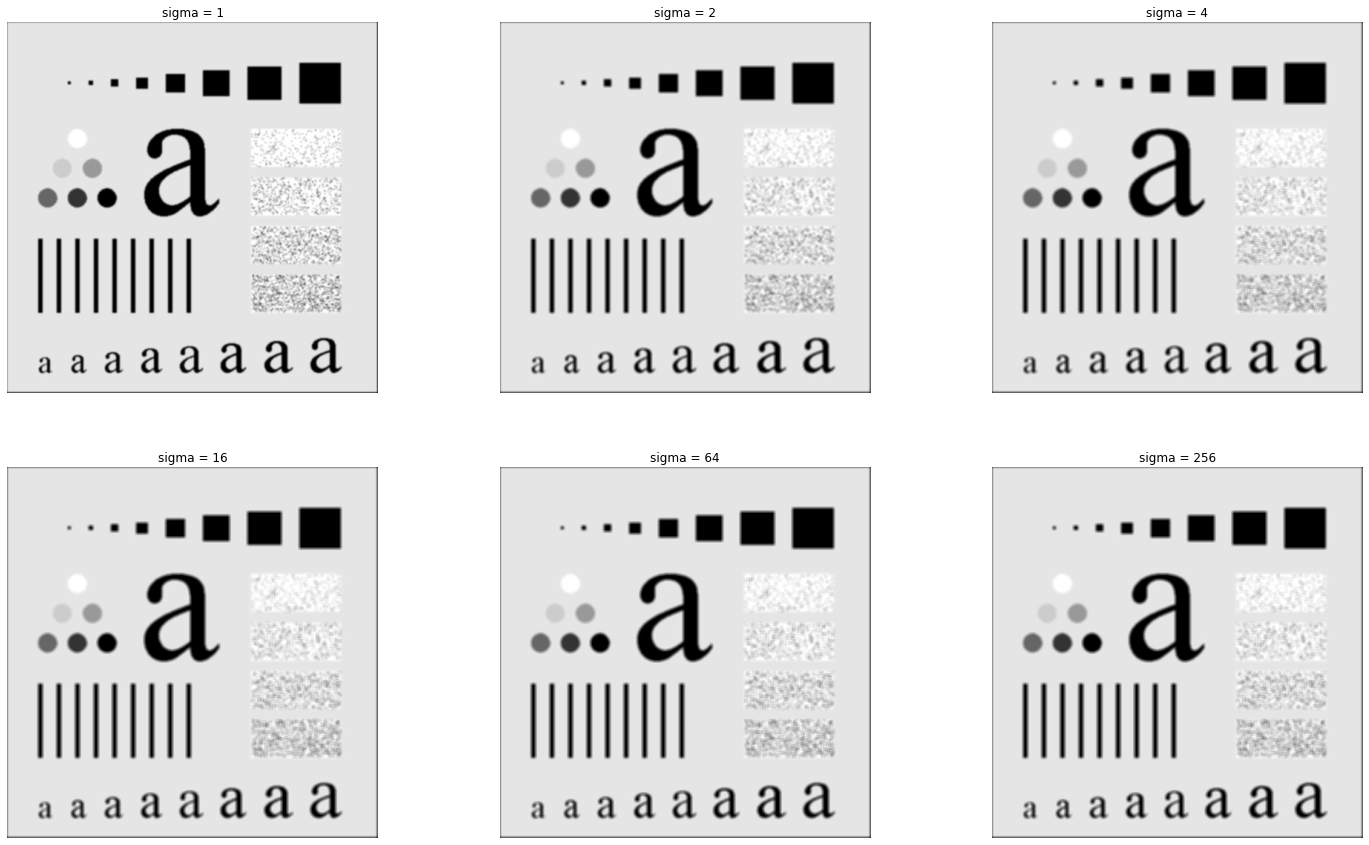

In [36]:
# k is kernel size

def gaussianFilter(img, k, sigma):

    # size = int(2 * np.ceil(3 * sigma) + 1)

    # Convert to grayscale if required
    if img.ndim == 3:
        img = np.mean(img, axis=-1)
    
    # Generate a 2D Gaussian kernel
    kernel = np.fromfunction(
    lambda x, y: np.exp(- ((x - (k-1)/2)**2 + (y - (k-1)/2)**2) / (2*sigma**2)),
    (k, k)
)

    # Normalize the kernel
    kernel = kernel / np.sum(kernel)
    filtered_img = conv2D(img, kernel)
    return filtered_img

sigma_values = [1,2,4,16,64,256]
    
# Gaussian_IMG1 = gaussianFilter(IMG1,5,4)
plt.figure(figsize=(25, 15))

for i, sigma in enumerate(sigma_values):
    Gaussian_img = gaussianFilter(IMG1, 5, sigma)
    plt.subplot(2, 3, i % 6 + 1)  
    plt.imshow(Gaussian_img, cmap='gray')
    plt.title(f'sigma = {sigma}')
    plt.axis('off')

# plt.subplot(1,2,1)
# plt.imshow(IMG1, cmap="gray")
# plt.title("Original Test Pattern Image")

# plt.subplot(1,2,2)
# plt.imshow(Gaussian_IMG1, cmap="gray")
# plt.title("Test Pattern Image with Gaussian Filter applied")

- As value of sigma increases, we notice a stronger blur, i.e. the details in the image become less distinct.

- This is because as sigma increases, the weightage given to neighbouring pixels in the kernel also progressively increases (as per the formula for Gaussian) and the focus is deviated from the center pixels.

- The more pronounced smoothing effect is due to more contribution of the surrounding pixels to compute the average value of given pixel.

### Comparing results of mean and Gaussian as sigma -> infinity

Text(0.5, 1.0, 'Test Pattern Image with Mean Filter applied')

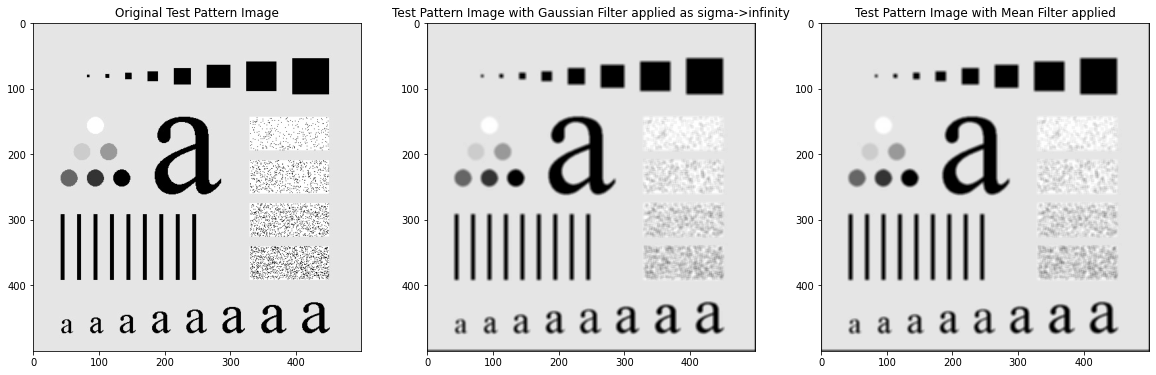

In [235]:
sigma = float('inf')  # Sigma tends to infinit

gaussian_IMG1_when_sigma_infinity = gaussianFilter(IMG1,5,sigma)


plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plt.imshow(IMG1, cmap="gray")
plt.title("Original Test Pattern Image")

plt.subplot(1,3,2)
plt.imshow(gaussian_IMG1_when_sigma_infinity, cmap="gray")
plt.title("Test Pattern Image with Gaussian Filter applied as sigma->infinity")

plt.subplot(1,3,3)
plt.imshow(mean_IMG1, cmap="gray")
plt.title("Test Pattern Image with Mean Filter applied")

- We note that both Mean and Gaussian filter display nearly the same results as sigma for Gaussian tends to infinity.

- This is because as sigma goes to infinity, the exponent becomes 0 and hence weight of each neighbourhood pixel becomes same according to the formula: weight = e^(-(x^2 + y^2) / (2 * σ^2))

- Because as sigma tends to infinity, exponent becomes 0. Therefore, e^0 = 1. This implies constant and equal weight (=1) for each neighbourhood pixel, consequently behaving as the mean filter.

### 2. NEED FOR SPEED

/tmp/ipykernel_6137/3633369967.py:30: RuntimeWarning: overflow encountered in ulong_scalars
  cursum = integral[y2,x2] - integral[y2,x1] - integral[y1,x2]
/tmp/ipykernel_6137/3633369967.py:31: RuntimeWarning: overflow encountered in ulong_scalars
  cursum += integral[y1,x1]


Text(0.5, 1.0, 'Output image with speedy mean filter applied')

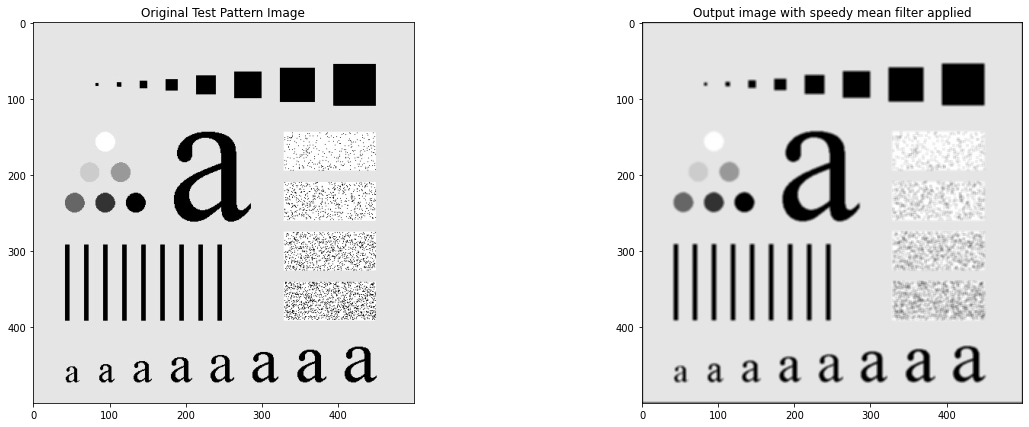

In [37]:
import numpy as np
import cv2

def integral_image(image):
    return np.cumsum(np.cumsum(image, axis = 0), axis = 1)

def speedymeanFilter(img, kernel_size):

    height, width = img.shape
    pad = kernel_size // 2

    result_image = np.zeros((height, width))

    integral = integral_image(IMG1)
    integral = integral_image(IMG1).astype(np.uint64)

    for i in range(height):
        for j in range(width):
 
            # top = max(0, i - pad)
            # left = max(0, j - pad)
            # bottom = min(height-1, i + pad)
            # right = min(width-1, j + pad)
            
            y1 = max(0, i - pad)
            x1 = max(0, j - pad)
            y2 = min(height-1, i + pad)
            x2 = min(width-1, j + pad)
            
            cursum = integral[y2,x2] - integral[y2,x1] - integral[y1,x2]
            cursum += integral[y1,x1]
            result_image[i,j] = cursum/(kernel_size*kernel_size)

    result_image = result_image.astype(np.uint8)  
    return result_image


output_image = speedymeanFilter(IMG1, 5)

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.imshow(IMG1, cmap="gray")
plt.title("Original Test Pattern Image")

plt.subplot(1,2,2)
plt.imshow(output_image, cmap="gray")
plt.title("Output image with speedy mean filter applied")

### Plotting the Run Time v/s kernel size for the meanFilter and speedymeanFilter

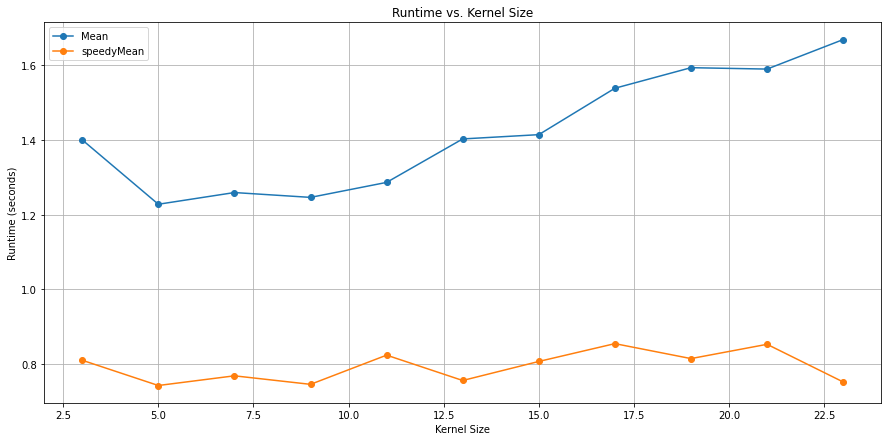

In [242]:
import time

# Taking odd kernel size for 1 to 11
kernel_sizes = [k for k in range(3, 25) if k % 2 != 0]

mean_array = []
speedy_mean_array = []

for k in kernel_sizes:

    start = time.time()
    meanFilter(IMG1, k)
    mean_runtime = time.time() - start
    mean_array.append(mean_runtime)

    start = time.time()
    speedymeanFilter(IMG1,k)
    speedy_mean_runtime = time.time() - start
    speedy_mean_array.append(speedy_mean_runtime)

plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(kernel_sizes, mean_array, label='Mean', marker="o")
plt.plot(kernel_sizes, speedy_mean_array, label='speedyMean', marker="o")
plt.xlabel('Kernel Size')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.title('Runtime vs. Kernel Size')
plt.show()

- We note that as the kernel size increases, the time taken by the speedy mean filter to execute remains more or less constant and significantly less than that taken by the normal mean filter, which increases progressively as kernel size increases.

- The plot for the speedy mean filter is represented by a straight line with a slope of zero and a low y-intercept. 

- Conversely, the plot for the normal mean filter is distinguished by a higher y-intercept and a somewhat rising slope.

Hence, the speedy mean filter operates in constant time, regardless of the kernel size.

### 3. SALT AND PEPPER

(-0.5, 493.5, 324.5, -0.5)

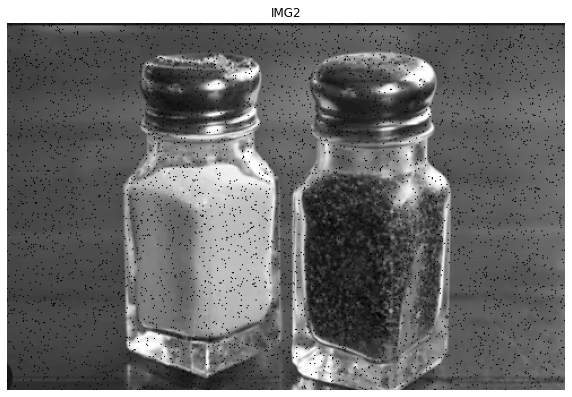

In [174]:
plt.figure(figsize = (10,7))
plt.imshow(IMG2, cmap="gray")
plt.title("IMG2")
plt.axis("off")

- As seen in the above image, the type of noise added to IMG2 is pepper noise which appears as small sparse black dots throughout the image.

(-0.5, 493.5, 324.5, -0.5)

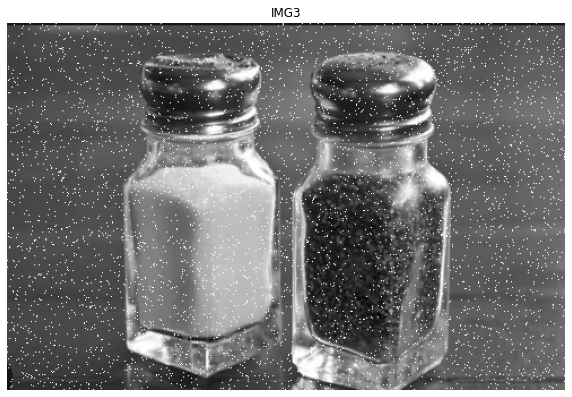

In [175]:
plt.figure(figsize = (10,7))
plt.imshow(IMG3, cmap="gray")
plt.title("IMG3")
plt.axis("off")

- As seen in the above image, the type of noise added to IMG3 is salt noise which appears as small sparse white dots throughout the image.

(-0.5, 493.5, 324.5, -0.5)

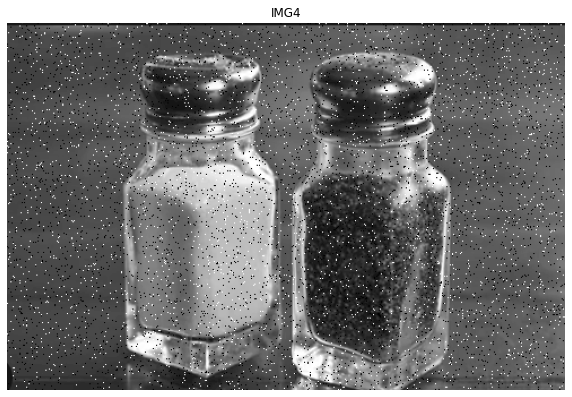

In [176]:
plt.figure(figsize = (10,7))
plt.imshow(IMG4, cmap="gray")
plt.title("IMG4")
plt.axis("off")

- As seen in the above image, the type of noise added to IMG4 is salt and pepper noise which appears as small sparse white and black dots throughout the image.

### Max Filter to reduce Pepper Noise

Text(0.5, 1.0, 'Max Filter applied on Pepper noise')

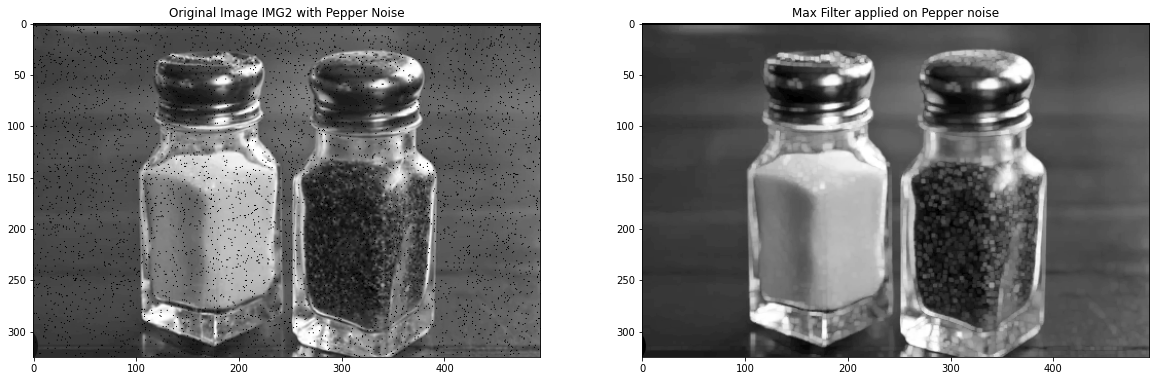

In [178]:
def maxFilter(img, k):
    h, w = img.shape
    pad = k // 2
    
    # Create an empty array to store the filtered image
    filtered_img = np.zeros((h, w), dtype=np.uint8)
    
    # Iterate through the image
    for i in range(h):
        for j in range(w):

            # Define the bounds for the region of interest (ROI)
            top = max(i - pad, 0)
            bottom = min(i + pad + 1, h)
            left = max(j - pad, 0)
            right = min(j + pad + 1, w)
            
            # Extract the region from the input image
            region = img[top:bottom, left:right]
            
            # Get the maximum value in the region
            max_value = np.max(region)
            filtered_img[i, j] = max_value
    
    return filtered_img
pepper_less = maxFilter(IMG2,3)

plt.figure(figsize =(20,15))

plt.subplot(1,2,1)
plt.imshow(IMG2, cmap="gray")
plt.title("Original Image IMG2 with Pepper Noise")

plt.subplot(1,2,2)
plt.imshow(pepper_less, cmap="gray")
plt.title("Max Filter applied on Pepper noise")

### Min Filter to reduce Salt Noise

Text(0.5, 1.0, 'Min Filter applied on Salt noise')

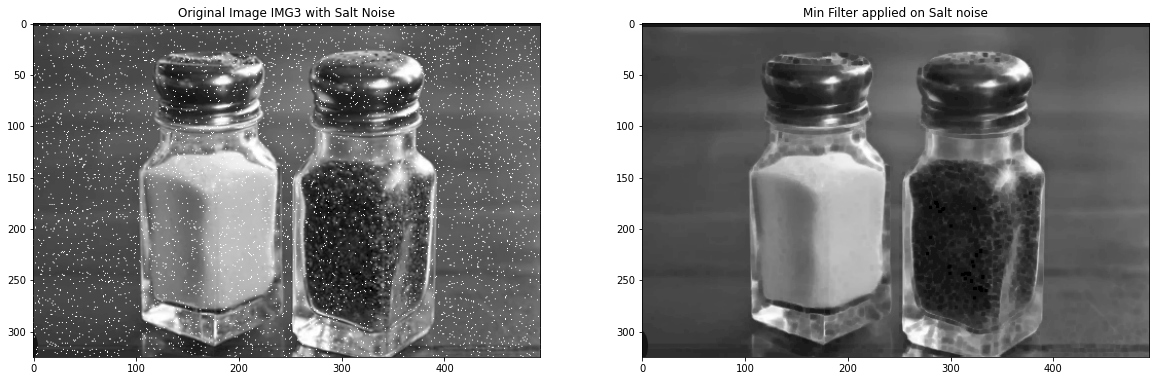

In [179]:
def MinFilter(image,k):
    h,w = image.shape

    padding = k//2

    filtered_image = np.zeros((h,w), dtype = np.uint8)

    for i in range(h):
        for j in range(w):

            top = max(i-padding, 0)
            left = max(j - padding,0)
            bottom = min(i + padding + 1, h)
            right = min(j+ padding + 1, w)

            region = image[top:bottom, left:right]

            min_val = np.min(region)
            filtered_image[i,j] = min_val

    return filtered_image

salt_less = MinFilter(IMG3,3)

plt.figure(figsize =(20,15))

plt.subplot(1,2,1)
plt.imshow(IMG3, cmap="gray")
plt.title("Original Image IMG3 with Salt Noise")

plt.subplot(1,2,2)
plt.imshow(salt_less, cmap="gray")
plt.title("Min Filter applied on Salt noise")

### Median Filter to Reduce Salt and Pepper Noise

Text(0.5, 1.0, 'Median Filter applied on Salt and Pepper noise')

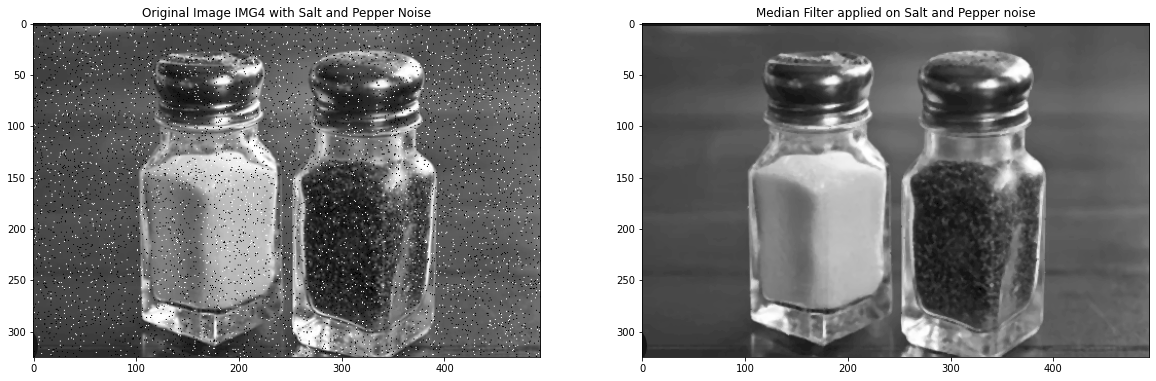

In [180]:
def MedianFilter(img,k):
    h,w = img.shape
    padding = k//2
     
    filtered_img = np.zeros((h,w), dtype=np.uint8)
     
    for i in range(h):
        for j in range(w):

            top = max(i - padding, 0)
            left = max(j - padding, 0)
            bottom = min(i + padding + 1,h)
            right = min(j + padding + 1 ,w)

            region = img[top:bottom, left:right]

            mid_value = np.median(region)
            filtered_img[i,j] = mid_value
            
    return filtered_img

salt_and_pepper_less = MedianFilter(IMG4,3)
plt.figure(figsize =(20,15))

plt.subplot(1,2,1)
plt.imshow(IMG4, cmap="gray")
plt.title("Original Image IMG4 with Salt and Pepper Noise")

plt.subplot(1,2,2)
plt.imshow(salt_and_pepper_less, cmap="gray")
plt.title("Median Filter applied on Salt and Pepper noise")

### 4. BLURRY?

#### Sharpening Using Mean Filter

(-0.5, 693.5, 518.5, -0.5)

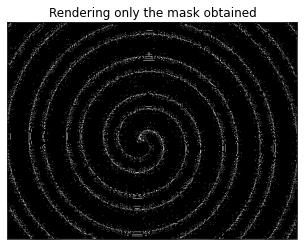

In [40]:
def sharpenMean(img, A, k):
    # A is amplification factor
    
    if img.ndim == 3:
        img = np.mean(img, axis=-1)

    blurred = meanFilter(img, k)
    mask = img - blurred
    sharpened = img + A * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    #return sharpened
    return mask

mask = sharpenMean(IMG5, 2, 5)

plt.imshow(mask, cmap="gray")
plt.title("Rendering only the mask obtained")
plt.axis("off")

# # high_boost = sharpen(IMG5,20,3)
# # unsharp_mask = sharpen(IMG5,1,3)

# # plt.figure(figsize=(20,10))

# # plt.subplot(1,3,1)
# # plt.imshow(IMG5, cmap="gray")
# # plt.title("Original Spiral Image")

# # plt.subplot(1,3,2)
# # plt.imshow(unsharp_mask, cmap="gray")
# # plt.title("Unsharp Masking using Mean Filter")

# # plt.subplot(1,3,3)
# # plt.imshow(high_boost, cmap="gray")
# # plt.title("High Boost Filtering using Mean Filter")

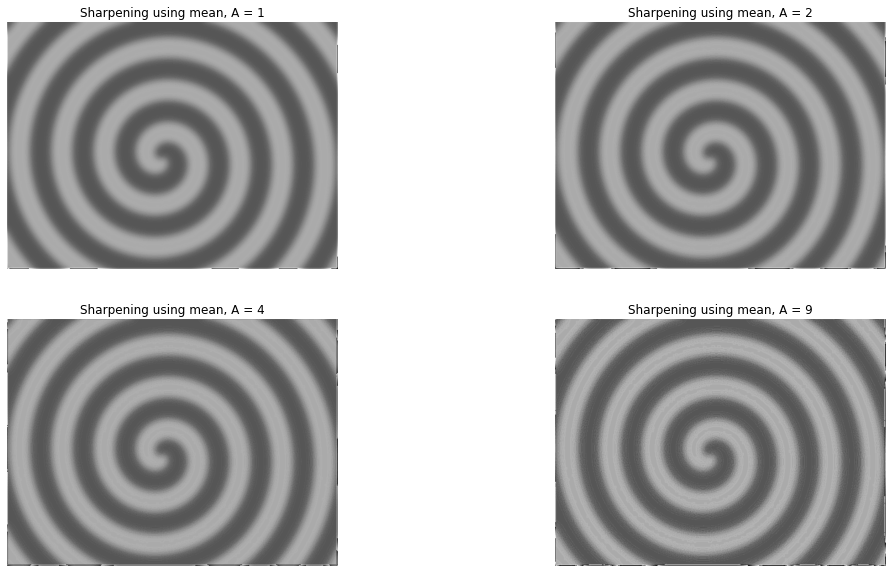

In [248]:
def sharpenMean(img, A, k):
    # A is amplification factor
    
    if img.ndim == 3:
        img = np.mean(img, axis=-1)

    blurred = meanFilter(img, k)
    mask = img - blurred
    sharpened = img + A * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    return sharpened
    #return mask

plt.figure(figsize=(18, 10))
A_values = [1,2,4,9]

for i,A in enumerate(A_values):
    res = sharpenMean(IMG5, A, 5)
    plt.subplot(2,2,i+1)
    plt.imshow(res, cmap='gray')
    plt.title(f'Sharpening using mean, A = {A}')
    plt.axis('off')

#### Sharpening Using Gaussian Filter

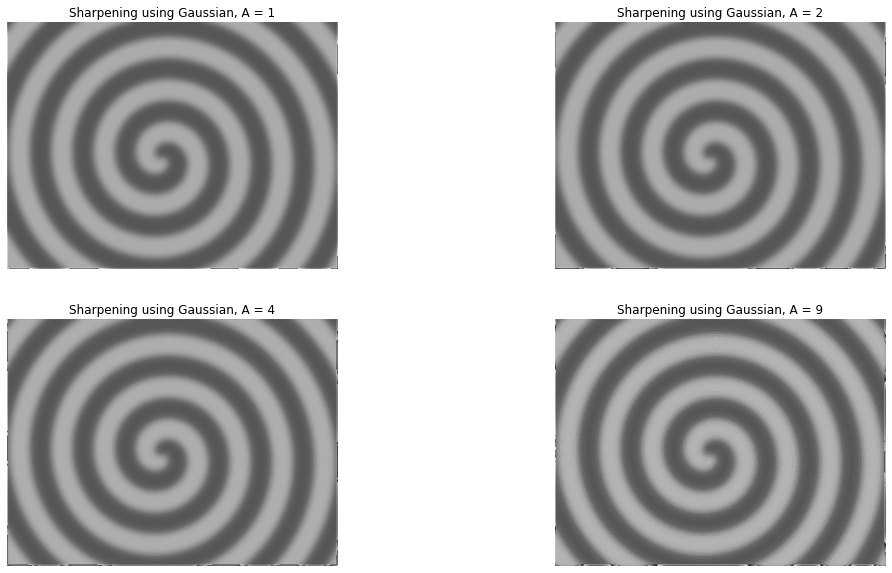

In [249]:
def sharpenGaussian(img, A, k):

    # Taking sigma as 2
    blurred = gaussianFilter(img, k, 2)

    mask = img - blurred
    sharpened = img + A * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened
    #return mask


plt.figure(figsize=(18, 10))
A_values = [1,2,4,9]

for i,A in enumerate(A_values):
    res = sharpenGaussian(IMG5, A, 5)
    plt.subplot(2,2,i+1)
    plt.imshow(res, cmap='gray')
    plt.title(f'Sharpening using Gaussian, A = {A}')
    plt.axis('off')

### Side by side comparison of sharpening using Mean and Gaussian Filter:

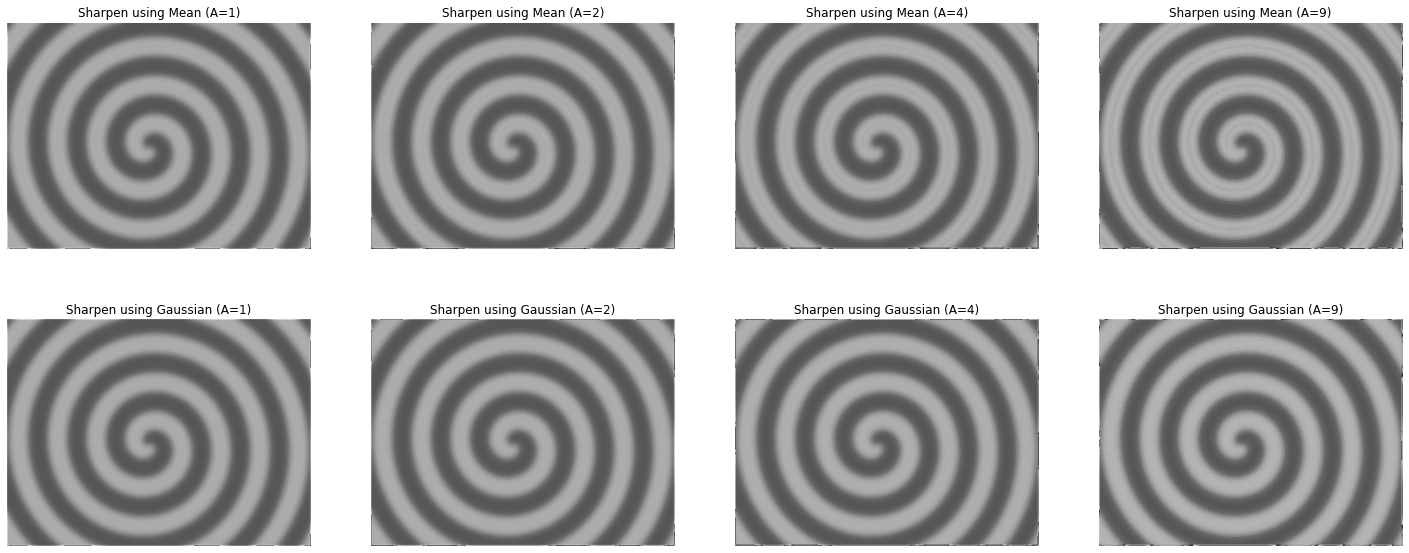

In [250]:
plt.figure(figsize=(25, 10))


A_values = [1,2,4,9]

for i,A in enumerate(A_values):
    res1 = sharpenMean(IMG5, A, 5)
    res2 = sharpenGaussian (IMG5,A,5)

    plt.subplot(2, 4, i+1)
    plt.imshow(res1, cmap='gray')
    plt.title(f'Sharpen using Mean (A={A})')
    plt.axis('off')
    
    plt.subplot(2, 4, i+5)
    plt.imshow(res2, cmap='gray')
    plt.title(f'Sharpen using Gaussian (A={A})')
    plt.axis('off')

### Observations with Mean and Gaussian Filter:

- The Gaussian filter is known for providing a smoother blurring effect, resulting in a mask that exhibits a more gradual transition.

- When employing the mean filter for sharpening, we observe artifacts in the form of spiral lines within the white spiral patches. These lines become more noticeable and may even appear darker as the value of parameter A increases. This indicates that high boost filtering with a mean kernel enhances all edges, including noise. This phenomenon is clearly evident in the generated output images.

- However, such artifacts are notably absent when sharpening images using the Gaussian Filter. The output images are visually more appealing and exhibit a cleaner result.

### 5. COUNTING COINS
#### Sobel, Prewitt and Laplacian Filters are used to detect the edges in an image.

#### Sobel Filter

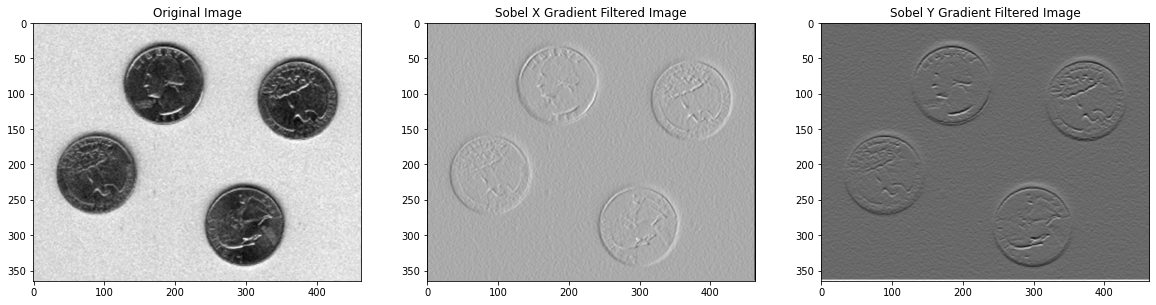

In [128]:
sobel_X_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2], 
                           [-1, 0, 1]])

sobel_Y_kernel = np.array([[1, 2, 1], 
                           [0, 0, 0], 
                           [-1, -2, -1]])

def Sobel(img):
    gradient_x = conv2D(img, sobel_X_kernel)
    gradient_y = conv2D(img, sobel_Y_kernel)
    
    # Compute the magnitude of the gradient
    # gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    return gradient_x, gradient_y
    
sobel_x, sobel_y = Sobel(IMG6)


# Plot the image
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.imshow(IMG6, cmap='gray')
plt.title('Original Image')

# Plot the gradient vectors
plt.subplot(1,3,2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X Gradient Filtered Image')


plt.subplot(1,3,3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y Gradient Filtered Image')

plt.show()

#### Prewitt Filter

Text(0.5, 1.0, 'Prewitt Y Gradient Filtered Image')

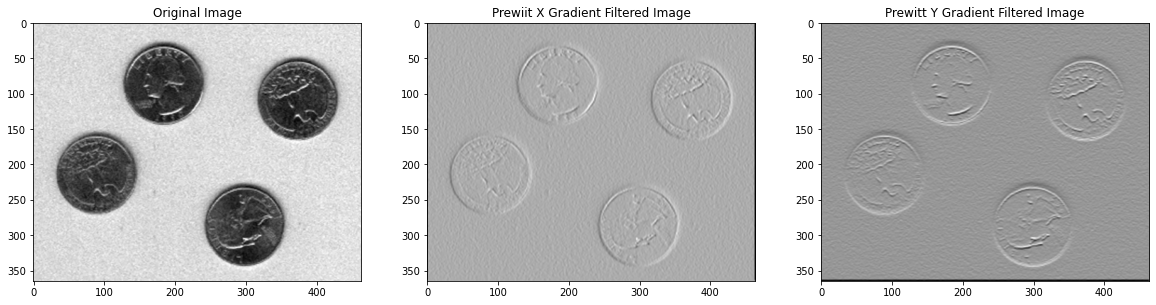

In [127]:
Prewitt_x_kernel = np.array([[-1, 0, 1], 
                             [-1, 0, 1], 
                             [-1, 0, 1]])

Prewitt_y_kernel = np.array([[-1, -1, -1], 
                            [0, 0, 0], 
                            [1, 1, 1]])

def Prewitt(img):
    gradient_x = conv2D(img, Prewitt_x_kernel)
    gradient_y = conv2D(img, Prewitt_y_kernel)
    # gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_x, gradient_y


Prewitt_x, Prewitt_y = Prewitt(IMG6)

plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.imshow(IMG6, cmap='gray')
plt.title('Original Image')

# Plot the gradient vectors
plt.subplot(1,3,2)
plt.imshow(Prewitt_x, cmap='gray')
plt.title('Prewiit X Gradient Filtered Image')

plt.subplot(1,3,3)
plt.imshow(Prewitt_y, cmap='gray')
plt.title('Prewitt Y Gradient Filtered Image')

#### Laplacian Filter

Text(0.5, 1.0, 'Image with Laplacian Filter')

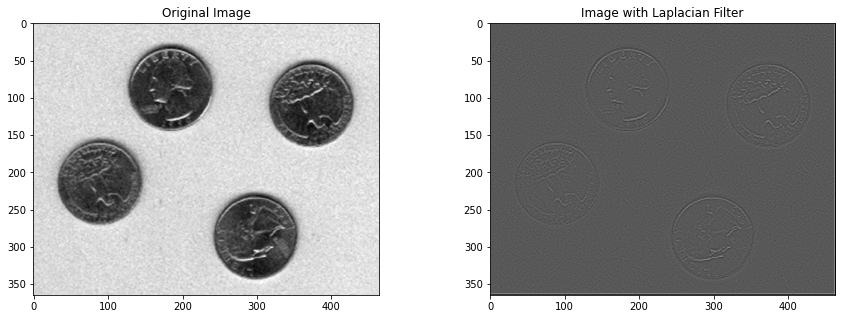

In [188]:
def LapLacian(img):
    laplacian_kernel = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]])
    filtered_img = conv2D(img, laplacian_kernel)
    return (filtered_img)
    

LapLacian_image = LapLacian(IMG6)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(IMG6, cmap='gray')
plt.title('Original Image')

# Plot the gradient vectors
plt.subplot(1,2,2)
plt.imshow(LapLacian_image, cmap='gray')
plt.title('Image with Laplacian Filter')

#### Results in Sobel:
- Notice the kernel for Sobel X: [[-1, 0, 1],
                                 [-2, 0, 2], 
                                 [-1, 0, 1]]

- Here, barring the central pixel, emphasis is on pixels that are linearly horizontal to the central pixel, as well as the diagonal pixels.




- Similarly, notice the kernel for sobel Y: [[1, 2, 1], 
                                            [0, 0, 0], 
                                            [-1,-2,-1]]

- Here, barring the central pixel, emphasis is on pixels that are linearly linearly vertical to the central pixel, as well as the diagonal pixels.

#### Results in Prewitt:

- Notice the kernel for Prewitt X: [[-1, 0, 1], 
                                   [-1, 0, 1], 
                                   [-1, 0, 1]]
- Here, weight is distributed to horizontally linear and diagonal pixels.

- Similarly, notice the kernel for Prewitt Y: [[-1, -1, -1], 
                                                [0, 0, 0], 
                                               [1, 1, 1]]
- Here, weight is distributed to vertically linear and diagonal pixels.


Both Prewitt and Sobel compute gradient in X and Y directions. The X gradient reveals edges running in vertical direction, while the Y gradient highlights edges that run in horizontal direction, as is evident from the kernel values and the output image of the coins. Sobel and Prewitt filters display quite resembling results in terms of edge detection.


#### Results in Laplacian:
- The Laplacian edge detection filter uses only one kernel unlike Sobel and Prewitt. It provides an overall edge detection across various directions.
- This implies that edges with a stark presence in any direction will be detected by the Laplacian kernel.
- Because of this reason, this filter is useful to detect edges in multiple orientations.

### 6. HURRY! MAKE IT BLURRY

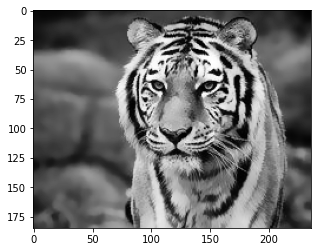

In [43]:
import numpy as np

def bilateralFilter(img, k, sigma_s, sigma_r):
    img = img.astype(np.float64)

    spatial_kernel = np.zeros((2*k+1, 2*k+1))

    # k pixels to left + k pixels to right  + one current = 2*k+1 pixels

    for i in range(-k, k+1):
        for j in range(-k, k+1):
            spatial_kernel[i+k, j+k] = np.exp(-(i**2 + j**2) / (2 * sigma_s**2))

    if len(img.shape) == 3:
        img = np.mean(img, axis=2)

    filtered_image = np.copy(img)

    h, w = img.shape

    for i in range(h):
        for j in range(w):

            top = max(i-k, 0)
            left = max(j-k, 0)
            bottom = min(i+k+1, h)
            right = min(j+k+1, w)

            region = img[top:bottom, left:right]
            region_h, region_w = region.shape

            intensity_kernel = np.exp(-(region - img[i, j])**2 / (2 * sigma_r**2))

            weights = spatial_kernel[:region_h, :region_w] * intensity_kernel

            filtered_image[i, j] = np.sum(weights / np.sum(weights) * region)

    return filtered_image.astype(np.uint8)

tiger_bi = bilateralFilter(IMG7, 3, 10, 20)
tiger_bi2 = bilateralFilter(IMG7, 3,1,5)

plt.imshow(tiger_bi, cmap="gray")
# cv2.imwrite("Images/Results/tigerbi.jpg", tiger_bi)
# cv2.imwrite("Images/Results/tigerbi2.jpg", tiger_bi2)

### Varying sigma_s values

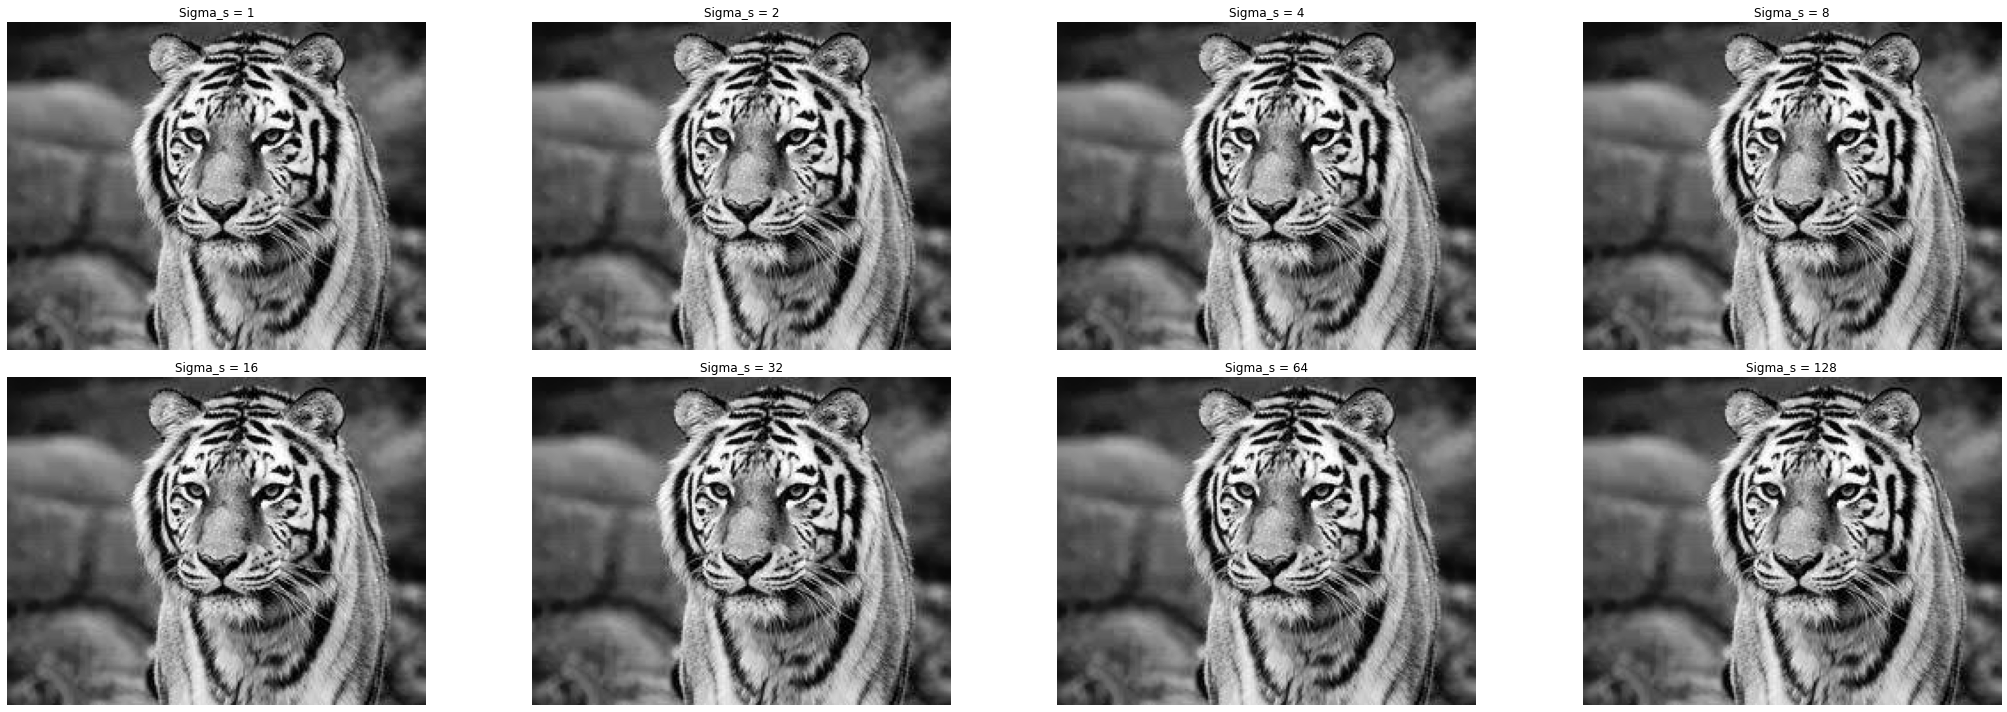

In [5]:
sigma_s_values = [1,2,4,8,16,32,64,128]

plt.figure(figsize=(30, 10))

for i, sigma_s in enumerate(sigma_s_values):
    filtered_img = bilateralFilter(IMG7, 5, sigma_s,2 )

    plt.subplot(2, 4, i+1)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Sigma_s = {sigma_s}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Varying sigma_r values

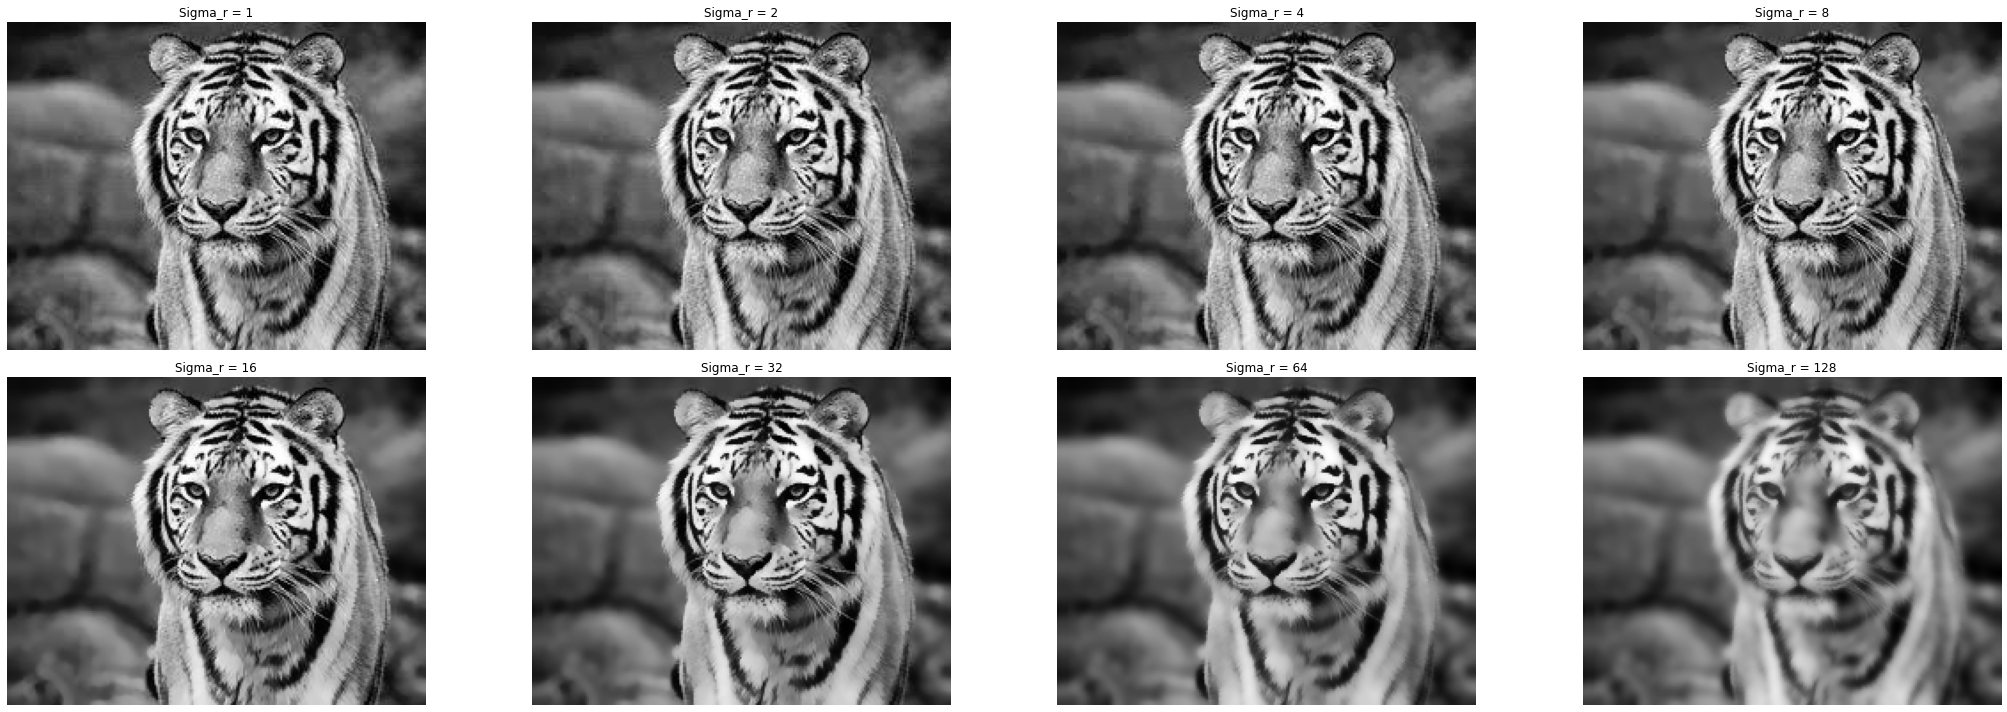

In [44]:
sigma_r_values = [1,2,4,8,16,32,64,128]

plt.figure(figsize=(30, 10))


for i, sigma_r in enumerate(sigma_r_values):
    filtered_img = bilateralFilter(IMG7, 5, 2, sigma_r)

    plt.subplot(2, 4, i+1)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Sigma_r = {sigma_r}')
    plt.axis('off')

plt.tight_layout()
plt.show()

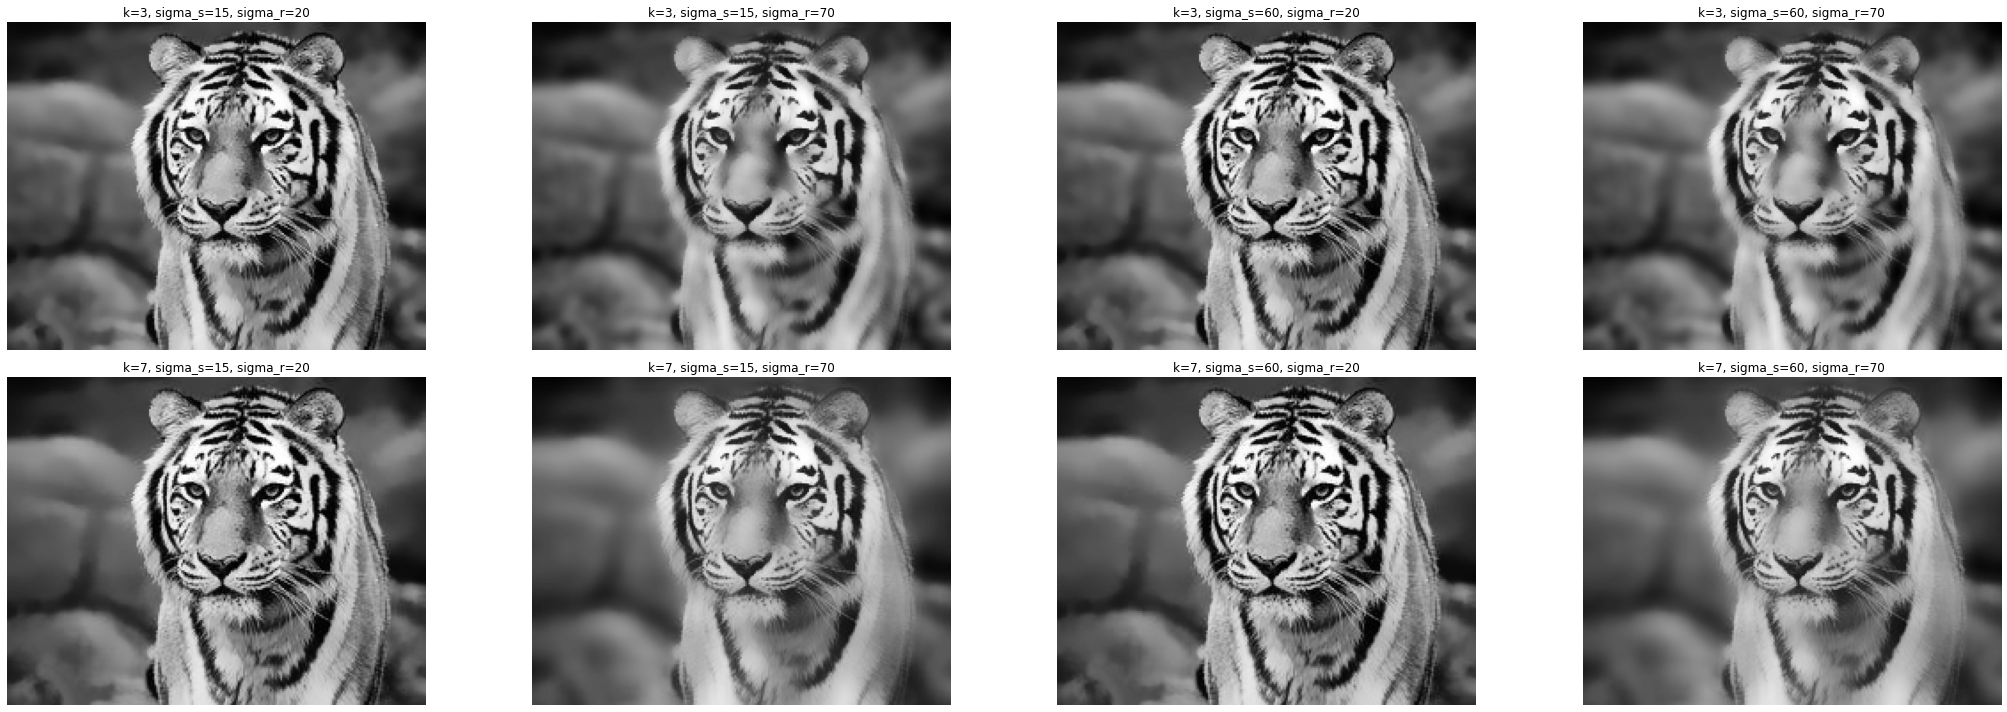

In [11]:
# Define the pairs of values
k_values = [3, 7]
sigma_s_values = [15, 60]
sigma_r_values = [20, 70]

# Load or generate your image (replace 'your_image_path.jpg' with your actual image path)
plt.figure(figsize=(30, 10))

counter = 1

for k in k_values:
    for sigma_s in sigma_s_values:
        for sigma_r in sigma_r_values:
            filtered_img = bilateralFilter(IMG7, k, sigma_s, sigma_r)
            plt.subplot(2, 4, counter)
            plt.imshow(filtered_img, cmap='gray')
            plt.title(f'k={k}, sigma_s={sigma_s}, sigma_r={sigma_r}')
            plt.axis('off')
            counter += 1

plt.tight_layout()
plt.show()

### Difference between the results of Bilateral and Gaussian Filter

(-0.5, 235.5, 184.5, -0.5)

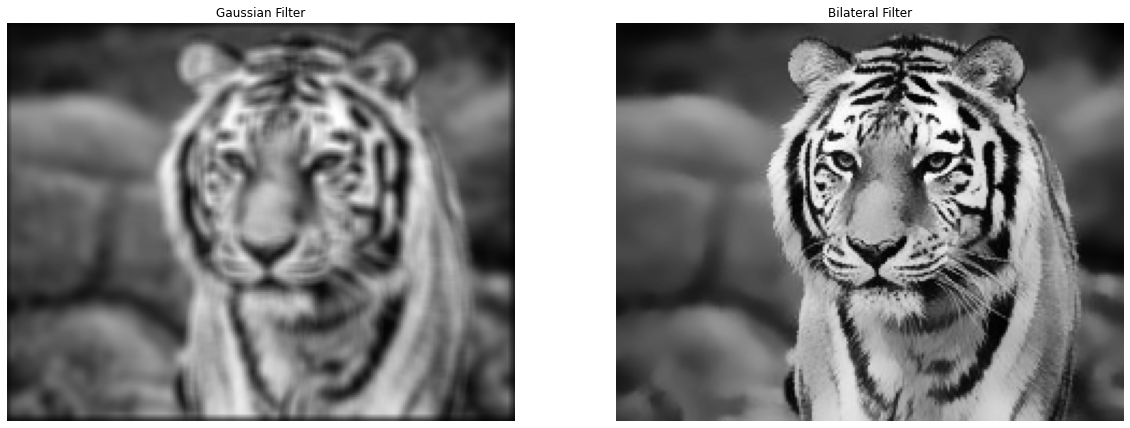

In [12]:
res1 = gaussianFilter(IMG7, 5, 30) # sigma_s is 30
res2 = bilateralFilter(IMG7, 5, 30, 30)  # sigma_s is 30, sigma_r is 10

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.imshow(res1, cmap='gray')
plt.title("Gaussian Filter")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(res2, cmap='gray')
plt.title("Bilateral Filter")
plt.axis("off")

##### We notice that on providing the same sigma_s values for distance weights, the Bilateral function provides a more clear output picture of the tiger, preserving the features such as eyes, nose, whiskers and stripes, while the Gaussian Filter output is blurred to a great extent and makes it difficult to distinctly recognise the details of in tiger's face. 

### Gaussian
- The Gaussian Filter tends to blur edges along with noise reduction.

- It might be useful for general purpose smoothing and noise reduction, but cannot preserve edges and fine details.

### Bilateral
- The Bilateral Filter, on the other hand, is better at preserving edges while also reducing noise. 

- This is because it employs minimal filtering along object borders.

- It is essentially an advanced version of Gaussian blurring, that employs a sigma_r to assign weights to "intensity" of neighbourhood pixels along with their "distance" from the pixel under consideration, to differentiate between object boundaries.

- It is often used when it's important to preserve edges and fine details, such as in image denoising or stylisation tasks.